# Stochastic Gradient Descent on the Rosenbrock Function

This notebook illustrates:

1. The Rosenbrock function in 2D (classic test problem).
2. A 3D surface & contour visualization.
3. Comparison of **gradient descent (GD)** vs **stochastic gradient descent (SGD)** in 2D.
4. An optional **higher-dimensional Rosenbrock** experiment to illustrate stochastic updates.

The plotting style is integrated with `classlib.nbviz` when available; otherwise, it falls back to default Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Try to use classlib.nbviz style if available
nbviz_available = False
try:
    import classlib as cl
    cl.nbviz.init(usetex=False)
    nbviz_available = True
    print('Initialized nbviz style from classlib.')
except Exception as e:
    print('classlib.nbviz not available; using default matplotlib style.')
    print('Reason:', e)

np.random.seed(123)  # for reproducibility

classlib.nbviz not available; using default matplotlib style.
Reason: init() got an unexpected keyword argument 'usetex'


## Rosenbrock Function (2D and $d$-dimensional)

The 2D Rosenbrock function is
\begin{align}
f(x, y) = (1 - x)^2 + 100 (y - x^2)^2.
\end{align}

A common $d$-dimensional generalization is
\begin{align}
f(x) = \sum_{i=1}^{d-1} \big[ (1 - x_i)^2 + 100 (x_{i+1} - x_i^2)^2 \big].
\end{align}


In [2]:
def rosenbrock_2d(x):
    """2D Rosenbrock function f(x1, x2)."""
    x1, x2 = x
    return (1 - x1)**2 + 100.0 * (x2 - x1**2)**2

def grad_rosenbrock_2d(x):
    """Gradient of 2D Rosenbrock."""
    x1, x2 = x
    dfdx1 = -2.0 * (1 - x1) - 400.0 * x1 * (x2 - x1**2)
    dfdx2 = 200.0 * (x2 - x1**2)
    return np.array([dfdx1, dfdx2])

def rosenbrock_nd(x):
    """d-dimensional Rosenbrock function.
    x is a 1D array of length d.
    """
    x = np.asarray(x)
    return np.sum((1.0 - x[:-1])**2 + 100.0 * (x[1:] - x[:-1]**2)**2)

def grad_rosenbrock_nd_full(x):
    """Full gradient of d-dimensional Rosenbrock."""
    x = np.asarray(x)
    d = x.size
    g = np.zeros_like(x)
    for i in range(d - 1):
        xi, xip1 = x[i], x[i+1]
        dfdxi = -2.0 * (1.0 - xi) - 400.0 * xi * (xip1 - xi**2)
        dfdxip1 = 200.0 * (xip1 - xi**2)
        g[i] += dfdxi
        g[i+1] += dfdxip1
    return g

def grad_rosenbrock_nd_term(x, i):
    """Gradient contribution from a single Rosenbrock term index i (using x_i and x_{i+1}).
    Returns a vector of same shape as x with zeros except at i and i+1.
    """
    x = np.asarray(x)
    d = x.size
    assert 0 <= i < d - 1
    xi, xip1 = x[i], x[i+1]
    dfdxi = -2.0 * (1.0 - xi) - 400.0 * xi * (xip1 - xi**2)
    dfdxip1 = 200.0 * (xip1 - xi**2)
    g = np.zeros_like(x)
    g[i] = dfdxi
    g[i+1] = dfdxip1
    return g

## 3D Surface Plot of the 2D Rosenbrock Function

We visualize the 2D Rosenbrock function as a surface. The narrow, curved valley
illustrates why simple gradient methods can struggle with step-size and direction.

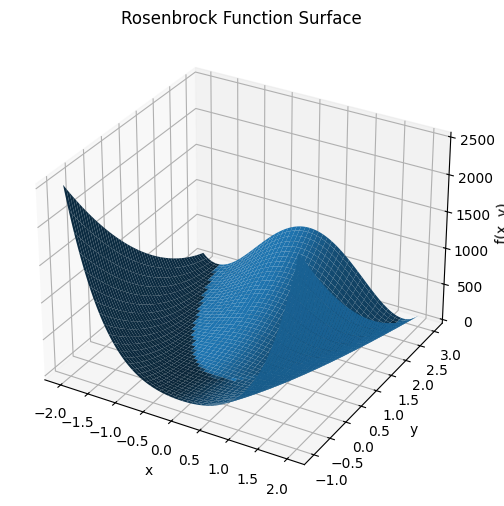

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Grid for plotting
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100.0 * (Y - X**2)**2

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, antialiased=True)
ax.set_title('Rosenbrock Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

## Gradient Descent vs Stochastic Gradient Descent (2D)

For the 2D problem, the function is not naturally a large sum of terms, so we
simulate **stochasticity** by adding noise to the gradient. This mimics the effect of
using noisy minibatch gradients in machine learning.

We compare:

- **GD**: full gradient descent.
- **SGD**: gradient + Gaussian noise at each step.


In [4]:
def gradient_descent_2d(x0, lr=1e-3, steps=5000):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    fvals = [rosenbrock_2d(x)]
    for k in range(steps):
        g = grad_rosenbrock_2d(x)
        x = x - lr * g
        path.append(x.copy())
        fvals.append(rosenbrock_2d(x))
    return np.array(path), np.array(fvals)

def sgd_2d_noisy(x0, lr=1e-3, steps=5000, noise_std=0.5):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    fvals = [rosenbrock_2d(x)]
    for k in range(steps):
        g = grad_rosenbrock_2d(x)
        g_noisy = g + noise_std * np.random.randn(2)
        x = x - lr * g_noisy
        path.append(x.copy())
        fvals.append(rosenbrock_2d(x))
    return np.array(path), np.array(fvals)

### Run 2D GD and Noisy SGD from the Same Starting Point

We start from a point far from the minimum and compare trajectories.

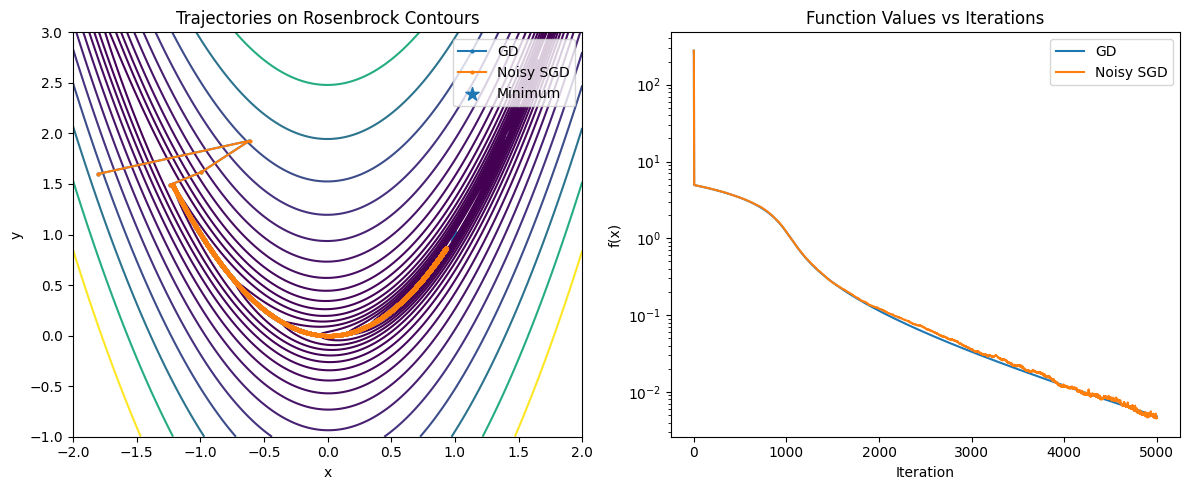

In [5]:
# Starting point
x0 = np.array([-1.8, 1.6])

# Run methods
path_gd, fvals_gd = gradient_descent_2d(x0, lr=1e-3, steps=5000)
path_sgd, fvals_sgd = sgd_2d_noisy(x0, lr=1e-3, steps=5000, noise_std=0.5)

# Contour plot with paths
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100.0 * (Y - X**2)**2

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Left: trajectories on contours
ax = axs[0]
cs = ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
ax.plot(path_gd[:, 0], path_gd[:, 1], '-', marker='o', markersize=2, label='GD')
ax.plot(path_sgd[:, 0], path_sgd[:, 1], '-', marker='o', markersize=2, label='Noisy SGD')
ax.scatter([1.0], [1.0], marker='*', s=100, label='Minimum')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectories on Rosenbrock Contours')
ax.legend()

# Right: function values vs iteration
ax = axs[1]
ax.semilogy(fvals_gd, label='GD')
ax.semilogy(fvals_sgd, label='Noisy SGD')
ax.set_xlabel('Iteration')
ax.set_ylabel('f(x)')
ax.set_title('Function Values vs Iterations')
ax.legend()

plt.tight_layout()
plt.show()

## Higher-Dimensional Rosenbrock: Coordinate-Wise Stochastic Updates

In higher dimensions, the Rosenbrock function can be written as a sum of overlapping
terms involving pairs $(x_i, x_{i+1})$. This allows a more "honest" stochastic
gradient step by randomly selecting one term index $i$ and updating using only
the gradient of that term. This parallels using a random minibatch in SGD.

Below, we compare **full gradient descent** vs a **stochastic, coordinate-wise
Rosenbrock SGD** for a modest dimension (e.g., $d=10$).

/var/folders/js/ft9wk_cx54v6_jkpt_p0ljwr0000gn/T/ipykernel_36516/1917472558.py:18: RuntimeWarning: overflow encountered in square
  return np.sum((1.0 - x[:-1])**2 + 100.0 * (x[1:] - x[:-1]**2)**2)
/var/folders/js/ft9wk_cx54v6_jkpt_p0ljwr0000gn/T/ipykernel_36516/1917472558.py:41: RuntimeWarning: overflow encountered in scalar power
  dfdxi = -2.0 * (1.0 - xi) - 400.0 * xi * (xip1 - xi**2)
/var/folders/js/ft9wk_cx54v6_jkpt_p0ljwr0000gn/T/ipykernel_36516/1917472558.py:42: RuntimeWarning: overflow encountered in scalar power
  dfdxip1 = 200.0 * (xip1 - xi**2)
/var/folders/js/ft9wk_cx54v6_jkpt_p0ljwr0000gn/T/ipykernel_36516/1917472558.py:18: RuntimeWarning: invalid value encountered in subtract
  return np.sum((1.0 - x[:-1])**2 + 100.0 * (x[1:] - x[:-1]**2)**2)
/var/folders/js/ft9wk_cx54v6_jkpt_p0ljwr0000gn/T/ipykernel_36516/1917472558.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  dfdxi = -2.0 * (1.0 - xi) - 400.0 * xi * (xip1 - xi**2)
/var/folders/js/ft9wk_cx54v6_j

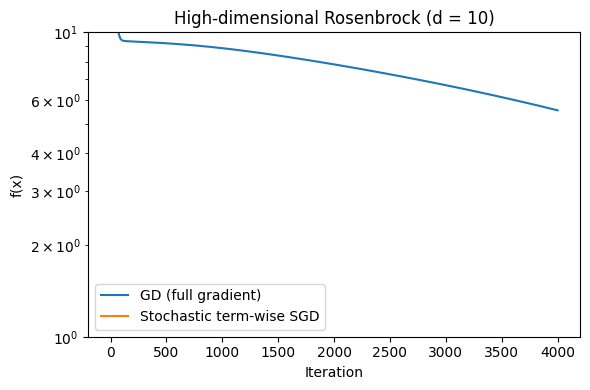

In [6]:
def gd_nd(x0, lr=1e-3, steps=2000):
    x = np.array(x0, dtype=float)
    fvals = [rosenbrock_nd(x)]
    for k in range(steps):
        g = grad_rosenbrock_nd_full(x)
        x = x - lr * g
        fvals.append(rosenbrock_nd(x))
    return np.array(fvals)

def sgd_nd_termwise(x0, lr=1e-3, steps=2000):
    x = np.array(x0, dtype=float)
    d = x.size
    fvals = [rosenbrock_nd(x)]
    for k in range(steps):
        i = np.random.randint(0, d - 1)  # choose a random term index
        g_i = grad_rosenbrock_nd_term(x, i)
        x = x - lr * g_i
        fvals.append(rosenbrock_nd(x))
    return np.array(fvals)

# Dimension and initial point
d = 10
x0_nd = np.full(d, -1.5)

fvals_gd_nd = gd_nd(x0_nd, lr=2e-4, steps=4000)
fvals_sgd_nd = sgd_nd_termwise(x0_nd, lr=2e-3, steps=4000)

plt.figure(figsize=(6, 4))
plt.semilogy(fvals_gd_nd, label='GD (full gradient)')
plt.semilogy(fvals_sgd_nd, label='Stochastic term-wise SGD')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title(f'High-dimensional Rosenbrock (d = {d})')
plt.legend()
plt.tight_layout()
plt.show()

### Remarks

- In 2D, the main value of this example is **geometric intuition**: GD follows a smoother
  path along the valley; noisy SGD wanders more but can help escape pathological regions
  in more complex landscapes.
- In higher dimensions, viewing the Rosenbrock function as a sum of pairwise terms
  allows a more realistic **stochastic gradient** interpretation (random term index).
- The real advantage of SGD typically appears when the function is a sum over **many
  data points**, so each full gradient is very expensive; this toy example mirrors that
  structure in a controlled mathematical setting.

You can now adapt this notebook for other test functions or incorporate more advanced
optimizers like **momentum** or **Adam**.